In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files,drive
import shutil

In [ ]:
housing=fetch_california_housing()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(housing.data,housing.target,random_state=28)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,random_state=28)

In [ ]:
print(housing.feature_names)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)
X_test=sc.transform(X_test)

In [ ]:
np.random.seed(28)
tf.random.set_seed(28)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
X_valid.shape

(3870, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
model=keras.models.Sequential([
 keras.layers.Dense(30,activation='relu',input_shape=[8]),
 keras.layers.Dense(30,activation='relu'),
 keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [ ]:
model_history=model.fit(X_train,y_train,epochs=105,validation_data=(X_valid,y_valid))

In [ ]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3268 - mae: 0.4064


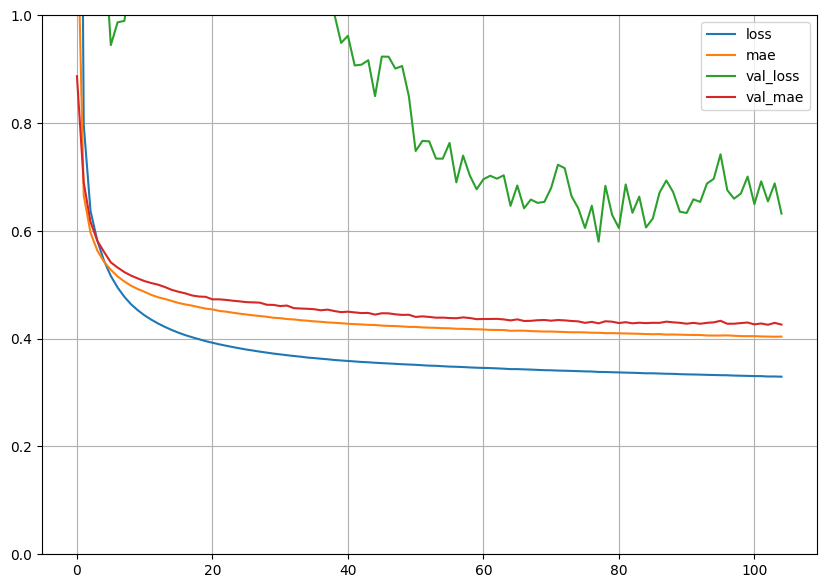

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

##**Functional API model**

In [ ]:
input_=keras.layers.Input(shape=X_train.shape[1:])
dense_1=keras.layers.Dense(30,activation='relu')(input_)
dense_2=keras.layers.Dense(30,activation='relu')(dense_1)
concat=keras.layers.concatenate([input_,dense_2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 30)                   270       ['input_2[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 30)                   930       ['dense_3[0][0]']             
                                                                                                  
 concatenate_1 (Concatenate  (None, 38)                   0         ['input_2[0][0]',             
 )                                                                   'dense_4[0][0]']         

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [ ]:
model_history=model.fit(X_train,y_train,epochs=105,validation_data=(X_valid,y_valid))

In [ ]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3373 - mae: 0.4141


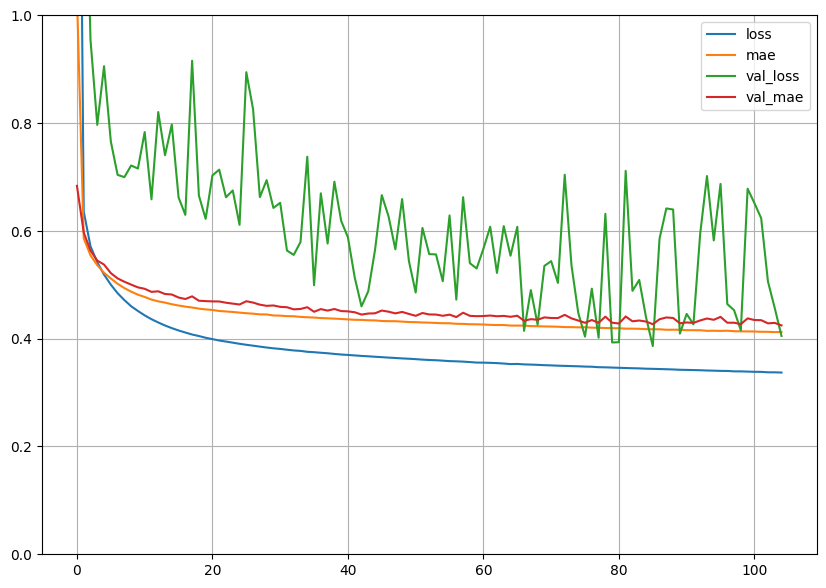

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('keras_model_rgn.keras')

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
 keras.layers.Dense(30,activation='relu',input_shape=[8]),
 keras.layers.Dense(30,activation='relu'),
 keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-5),
              metrics=['mae'])

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('early_stop_best_model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)

In [ ]:
model_history=model.fit(X_train,y_train,epochs=10000,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

In [ ]:
model=keras.models.load_model('/content/early_stop_best_model.h5')
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4664 - mae: 0.5110


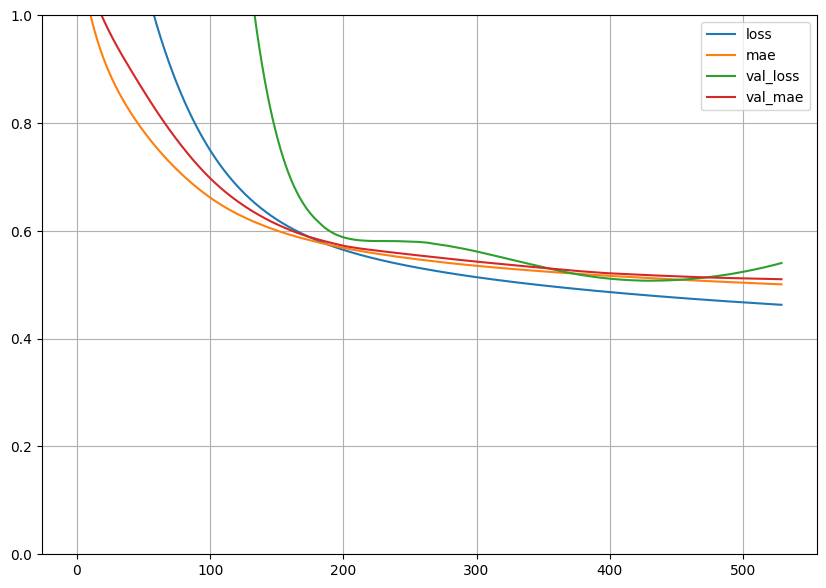

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()